In [2]:
import pandas as pd
redwine = pd.read_csv("winequality-red.csv",sep=";")
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
redwine.iloc[:,-1].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X = redwine.iloc[:,:-1].to_numpy()
y = redwine.iloc[:, -1] - 3

In [17]:
train_X, test_X, train_y, test_y = train_test_split(X,y) #75:25 train:test

In [18]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
mlp_model.fit(train_X, train_y)
mlp_model.score(test_X, test_y)

C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.6025

In [19]:
#최소 5가지 이상 알고리즘을 이용하여 wine data를 분류하는 모델을 만들고 학습 시킨 후 모델을 평가

In [20]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
idx = np.in1d(iris.target, [0,2])
X = iris.data[idx, 0:2]
y = iris.target[idx]

In [21]:
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter=100, random_state=1)
model.fit(X,y)

Perceptron(max_iter=100, random_state=1)

In [23]:
import matplotlib.pyplot as plt
X_min, X_max = X[:,0].min()-1, X[:,0].max()+1
Y_min, Y_max = X[:,1].min()-1, X[:,1].max()+1
XX, YY = np.meshgrid(np.linspace(X_min, X_max, 1000), np.linspace(Y_min, Y_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)

C:\Users\kosa\AppData\Local\Temp\ipykernel_14536\2648457832.py:1: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(XX, YY, ZZ, color='r')


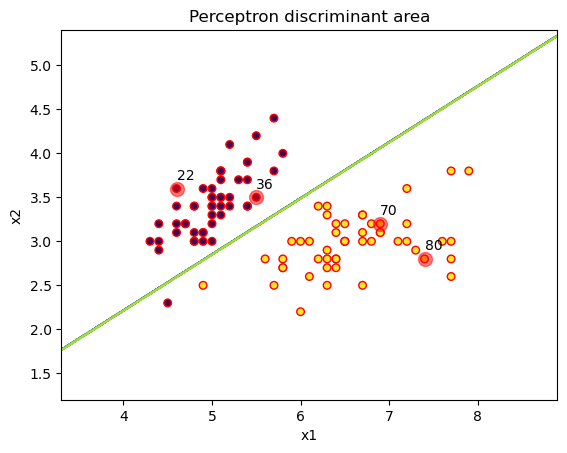

In [24]:
plt.contour(XX, YY, ZZ, color='r')
plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolor='r', linewidth=1)
idx=[22, 36, 70, 80]
plt.scatter(X[idx, 0], X[idx,1], c='r', s=100, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i,0], X[i,1] + 0.1))
plt.title("Perceptron discriminant area")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

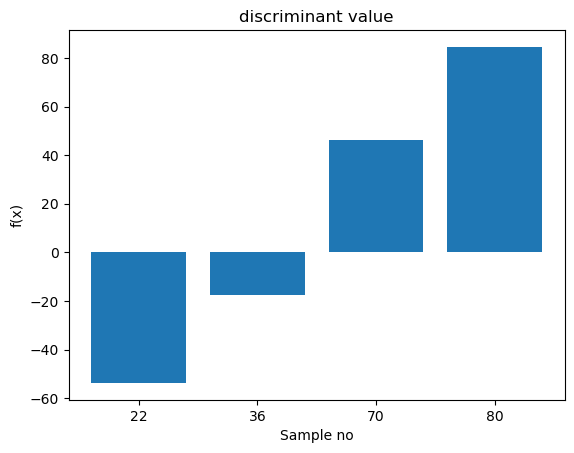

In [25]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.title("discriminant value")
plt.xlabel("Sample no")
plt.ylabel("f(x)")
plt.show()

In [26]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
idx = np.logical_or(iris.target == 0, iris.target == 1)
X = iris.data[idx, :3]
y = iris.target[idx]

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt

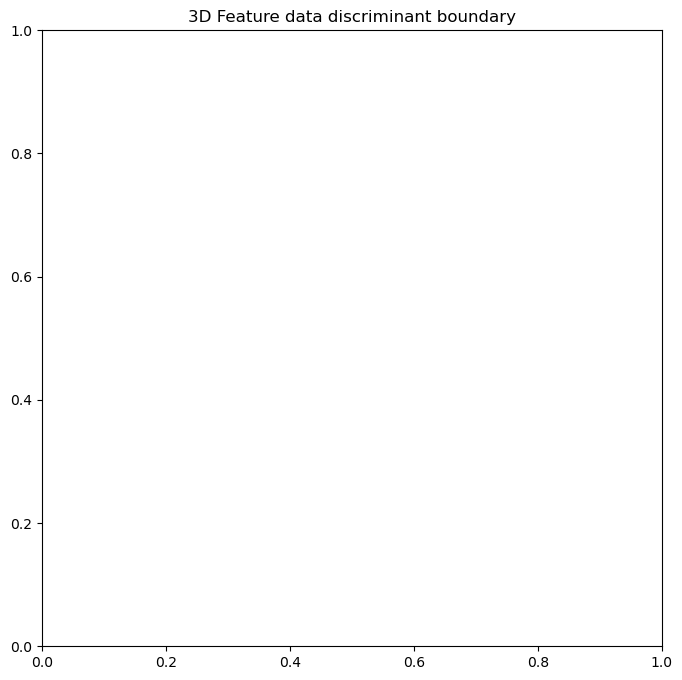

In [28]:
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig, elev=20, azim=10)
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, marker='o', s=100, cmap=mpl.cm.jet)
ax.plot_surface(np.array([[4,4], [7,7]]), np.array([[2,4.5], [2,4.5]]), np.array([[2,4], [2,4]]), color='g', alpha=.3)
plt.title("3D Feature data discriminant boundary")
plt.show()

In [29]:
import numpy as np
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300,2)
Y = np.logical_xor(X[:,0]>0, X[:,1]>0)

In [30]:
from sklearn.svm import SVC
model = SVC().fit(X,Y)
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\kosa\AppData\Local\Temp\ipykernel_14536\3850540288.py:3: UserWarning: The following kwargs were not used by contour: 'linewiths'
  contours = plt.contour(xx, yy, Z, levels=[0], linewiths=3)


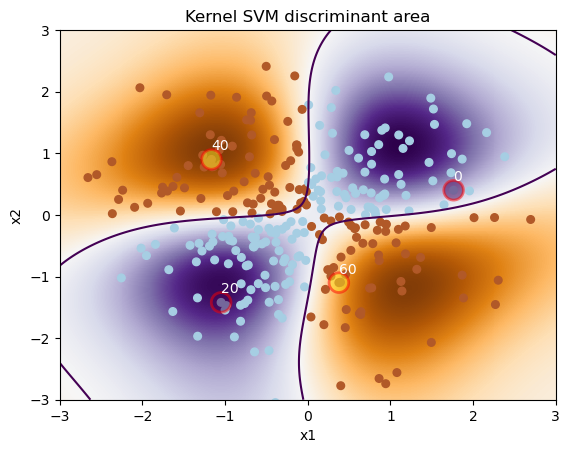

In [33]:
plt.imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewiths=3)
plt.scatter(X[:, 0], X[:,1], s=30, c=Y, cmap=plt.cm.Paired)
idx = [0,20,40,60]
plt.scatter(X[idx,0], X[idx,1], c=Y[idx], s=200, alpha=0.5, edgecolor='r', linewidth=2)
for i in idx:
    plt.annotate(i, xy=(X[i,0], X[i,1]+0.15), color='white')
plt.grid(False)
plt.axis([-3, 3, -3, 3])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Kernel SVM discriminant area")
plt.show()

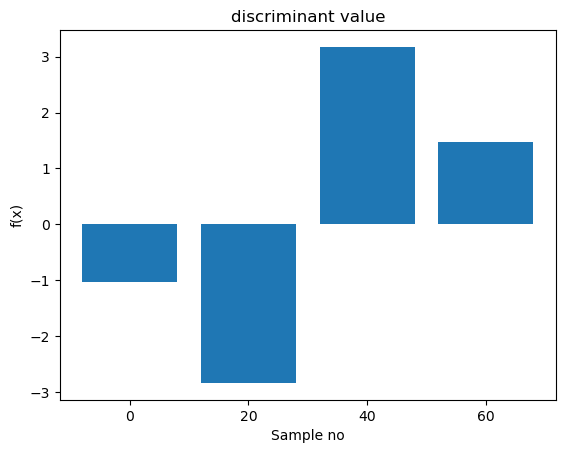

In [34]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.title("discriminant value")
plt.xlabel("Sample no")
plt.ylabel("f(x)")
plt.show()

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
model_ovo = OneVsOneClassifier(LogisticRegression())
model_ovo.fit(iris.data, iris.target)

OneVsOneClassifier(estimator=LogisticRegression())

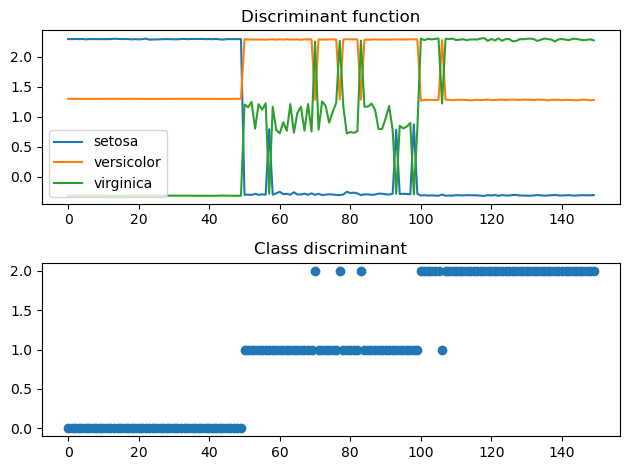

In [36]:
ax1 = plt.subplot(211)
disc1 = model_ovo.decision_function(iris.data)
df1 = pd.DataFrame(disc1)
plt.plot(df1)
plt.legend(["setosa", "versicolor", "virginica"])
plt.title("Discriminant function")
ax2=plt.subplot(212)
disc2 = model_ovo.predict(iris.data)
df2 = pd.DataFrame(disc2, columns=["prediction"])
plt.scatter(range(150), df2)
plt.title("Class discriminant")
plt.tight_layout()
plt.show()

In [37]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
model_ovr = OneVsRestClassifier(LogisticRegression())
model_ovr.fit(iris.data, iris.target)

OneVsRestClassifier(estimator=LogisticRegression())

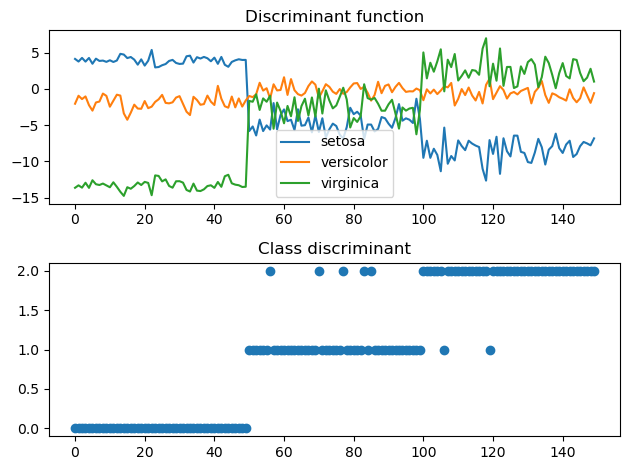

In [38]:
ax1 = plt.subplot(211)
disc1 = model_ovr.decision_function(iris.data)
df1 = pd.DataFrame(disc1)
plt.plot(df1)
plt.legend(["setosa", "versicolor", "virginica"])
plt.title("Discriminant function")
ax2 = plt.subplot(212)
disc2 = model_ovr.predict(iris.data)
df2 = pd.DataFrame(disc2, columns=["prediction"])
plt.scatter(range(150), df2)
plt.title("Class discriminant")
plt.tight_layout()
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
X = redwine.iloc[:,:-1].to_numpy()
y = redwine.iloc[:, -1] - 3

train_X, test_X, train_y, test_y = train_test_split(X,y) #75:25 train:test

from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
mlp_model.fit(train_X, train_y)
mlp_model.score(test_X, test_y)

C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5925

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(train_X, train_y)
rf_model.score(test_X, test_y)

0.6575

In [45]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(train_X, train_y)
lr_model.score(test_X, test_y)

C:\Users\kosa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5675

In [46]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(train_X, train_y)
nb_model.score(test_X, test_y)

0.5225

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(train_X, train_y)
dt_model.score(test_X, test_y)

0.5775